In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pickle
from CorrectFeatures import correct_SCT_data, correct_SCT_labels
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("TestData.csv")

In [3]:
model_test_data = RandomForestRegressor(n_estimators=100, n_jobs=8)


In [6]:
Y = data.Label

In [5]:
# Y = training_labels.drop(columns = ['attendance', 'number_over_4_hours',
#        'number_over_8_hours', 'percentage_within_8_hours',
#        'number_over_12_hours', 'percentage_within_12_hours',
#        'number_under_4_hours', 'number_4_hours_8_hours',
#        'number_8_hours_12_hours', 'percentage_within_4_hours'])

In [4]:
X = data.drop(columns=["Label"])

In [7]:
# X = training_data
# X["region_east"] = 1.0 *(X["region"] == "East")
# X["region_west"] =  1.0 *(X["region"] == "West")
# X["region_north"] =  1.0 *(X["region"] == "North")
# X = X.drop(columns=["region", "moon_phase_name"])
# for col in X.columns:
#     X[col] = X[col].astype(str).str.replace(',', '').astype(float)
#     if X[col].isna().any():
#         X[col] = X[col].fillna(0)

In [7]:
model_test_data.fit(X,Y)

RandomForestRegressor(n_jobs=8)

In [8]:
(mean_absolute_error(Y, model_test_data.predict(X)))

0.05750136282493114

In [11]:
# testing_data = correct_SCT_data(pd.read_csv("Data/Scotland/scottish_data_testing.csv"))
# testing_labels = correct_SCT_labels(pd.read_csv("Data/Scotland/scottish_labels_testing.csv"))

In [12]:
# X_test = testing_data
# Y_test = testing_labels

In [ ]:
# Y_test = testing_labels.drop(columns = ['attendance', 'number_over_4_hours',
#        'number_over_8_hours', 'percentage_within_8_hours',
#        'number_over_12_hours', 'percentage_within_12_hours',
#        'number_under_4_hours', 'number_4_hours_8_hours',
#        'number_8_hours_12_hours', 'percentage_within_4_hours'])
# X_test = testing_data
# X_test["region_east"] = 1.0 *(X_test["region"] == "East")
# X_test["region_west"] =  1.0 *(X_test["region"] == "West")
# X_test["region_north"] =  1.0 *(X_test["region"] == "North")
# X_test = X_test.drop(columns=["region", "moon_phase_name"])
# for col in X_test.columns:
#     X_test[col] = X_test[col].astype(str).str.replace(',', '').astype(float)
#     if X_test[col].isna().any():
#         X_test[col] = X_test[col].fillna(0)

In [13]:

# (mean_absolute_error(Y_test.proportion_under_4_hours, model_4_hours.predict(X_test)),
#  mean_absolute_error(Y_test.proportion_4_hours_8_hours, model_8_hours.predict(X_test)),
#  mean_absolute_error(Y_test.proportion_8_hours_12_hours, model_12_hours.predict(X_test)),
#  mean_absolute_error(Y_test.proportion_over_12_hours, model_long_hours.predict(X_test)))

(0.03002327547311541,
 0.025544762115306197,
 0.0049747671691534896,
 0.001811775446478096)

In [ ]:
# def divide_by_sum(tuple_):
#     sum_ = sum(tuple_)
#     return [e/sum_ for e in tuple_]
# normed_predictions = [list(l) for l in
#                       zip(*map(divide_by_sum,
#                                zip(model_4_hours.predict(X_test),
#                                    model_8_hours.predict(X_test),
#                                    model_12_hours.predict(X_test),
#                                    model_long_hours.predict(X_test))))
#                       ]
# (mean_absolute_error(Y_test.proportion_under_4_hours, normed_predictions[0]),
#  mean_absolute_error(Y_test.proportion_4_hours_8_hours, normed_predictions[1]),
#  mean_absolute_error(Y_test.proportion_8_hours_12_hours, normed_predictions[2]),
#  mean_absolute_error(Y_test.proportion_over_12_hours, normed_predictions[3]))

In [ ]:
# model_bytes = pickle.dumps((model_4_hours,
#                             model_8_hours,
#                             model_12_hours,
#                             model_long_hours))
# print(len(model_bytes))
# with open("Models/TrainingRandomForestScotlandModel.pkl", 'wb') as save_file:
#     save_file.write(model_bytes)


In [ ]:
# model_4_hours_loaded,\
# model_8_hours_loaded,\
# model_12_hours_loaded,\
# model_long_hours_loaded = None, None, None, None
# with open("Models/TrainingRandomForestScotlandModel.pkl", 'rb') as save_file:
#     model_bytes = save_file.read()
#     print(len(model_bytes))
#     model_4_hours_loaded,\
#     model_8_hours_loaded,\
#     model_12_hours_loaded,\
#     model_long_hours_loaded = pickle.loads(model_bytes)

In [ ]:
# (mean_absolute_error(Y_test.proportion_under_4_hours, model_4_hours_loaded.predict(X_test)),
#  mean_absolute_error(Y_test.proportion_4_hours_8_hours, model_8_hours_loaded.predict(X_test)),
#  mean_absolute_error(Y_test.proportion_8_hours_12_hours, model_12_hours_loaded.predict(X_test)),
#  mean_absolute_error(Y_test.proportion_over_12_hours, model_long_hours_loaded.predict(X_test)))

Text(0.5, 1.0, 'Feature Importance for Test Data Model')

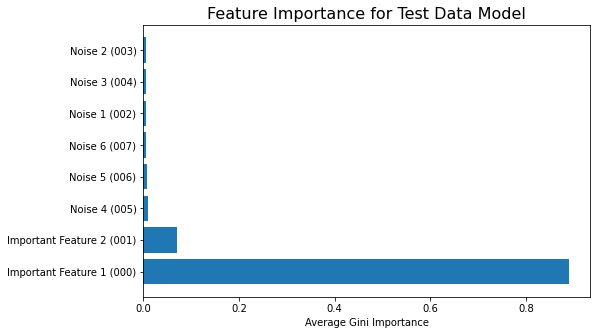

In [9]:
def format_names(names):
    return ["%s (%03d)"%(name, idx)for idx, name in enumerate(names)]
height, names= list(zip(*list(reversed(sorted(zip(
    model_test_data.feature_importances_,
    format_names(X.columns)
))))[:10]))
fig, axs = plt.subplots()
axs.barh(names, height)


axs.set_xlabel("Average Gini Importance")

fig.set_size_inches(8, 5)
axs.set_title("Feature Importance for Test Data Model", fontsize=16)

In [13]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

Text(0.5, 1.0, 'Feature Importance for Test Data Model')

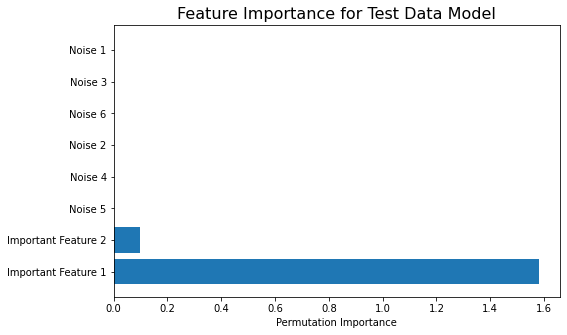

In [18]:
def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

perm_imp_rfpimp = permutation_importances(model_test_data, X, Y, r2)[:10]


fig, axs = plt.subplots()
axs.barh(perm_imp_rfpimp.index, perm_imp_rfpimp.Importance)


axs.set_xlabel("Permutation Importance")

fig.set_size_inches(8, 5)
axs.set_title("Feature Importance for Test Data Model", fontsize=16)

In [19]:
perm_imp_rfpimp

,Importance
Feature,
Important Feature 1,1.580635
Important Feature 2,0.098649
Noise 5,0.002965
Noise 4,0.002809
Noise 2,0.002566
Noise 6,0.002560
Noise 3,0.002301
Noise 1,0.001960
